# Quantum Computing Using IBM Qiskit 

## Session 1.  Basics


### Hwajung Kang,  Ph.D.,  IBM Quantum


# Concepts
## Qubit, Measurement, Operation, Phase

![](images/HPC_Korea_session1.001.jpeg)

![](images/HPC_Korea_session1.002.jpeg)

![](images/HPC_Korea_session1.003.jpeg)

![](images/HPC_Korea_session1.004.jpeg)

![](images/HPC_Korea_session1.005.jpeg)

![](images/HPC_Korea_session1.006.jpeg)

![](images/HPC_Korea_session1.007.jpeg)

![](images/HPC_Korea_session1.008.jpeg)

![](images/HPC_Korea_session1.009.jpeg)

![](images/HPC_Korea_session1.010.jpeg)

![](images/HPC_Korea_session1.011.jpeg)

![](images/HPC_Korea_session1.012.jpeg)

![](images/HPC_Korea_session1.013.jpeg)

![](images/HPC_Korea_session1.014.jpeg)

![](images/HPC_Korea_session1.015.jpeg)

![](images/HPC_Korea_session1.016.jpeg)

![](images/HPC_Korea_session1.017.jpeg)

![](images/HPC_Korea_session1.018.jpeg)

![](images/HPC_Korea_session1.019.jpeg)

![](images/HPC_Korea_session1.020.jpeg)

![](images/HPC_Korea_session1.021.jpeg)

![](images/HPC_Korea_session1.022.jpeg)

## Qiskit

![](images/qiskit.png)

![](images/HPC_Korea_session1.023.jpeg)

[IBM quantum experience](https://quantum-computing.ibm.com)

To work locally: Install Qiskit, go to `Quick Start` section of [this page](https://qiskit.org/)

In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram

- `Aer` is qiskit simulation package.


- A specific simulator or device is called a `backend`.


- `execute` takes a quantum circuit, or list of circuits, and a `backend` runs the circuits.


- By default, `execute` simulates `shots=1024` realizations of the circuit.


In [3]:
Aer.backends()

[QasmSimulator(
 backend_name='qasm_simulator', provider=AerProvider()),
 StatevectorSimulator(
 backend_name='statevector_simulator', provider=AerProvider()),
 UnitarySimulator(
 backend_name='unitary_simulator', provider=AerProvider()),
 PulseSimulator(
 backend_name='pulse_simulator', provider=AerProvider())]

## Single Qubit Operations - X, H, and Z

### X gate : Not gate

$X = \begin{bmatrix}0 & 1 \\ 1 & 0 \end{bmatrix} , ~~~~~~ XX = I$

$X|0\rangle = |1\rangle ~~~~~~~~~ X|1\rangle = |0\rangle $

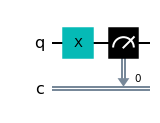

In [3]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure(0, 0)
qc.draw('mpl')

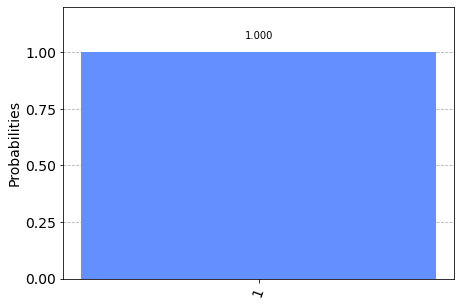

In [4]:
backend = Aer.get_backend('qasm_simulator')

job = execute(qc, backend)
results = job.result()
# Retrieve the measurement results for the circuit
count = results.get_counts()

plot_histogram(count)

The `Job` object is the reference used to check the status of the computation and return the results.

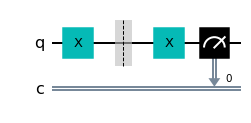

In [7]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.barrier()
qc.x(0)
qc.measure(0, 0)
qc.draw('mpl')

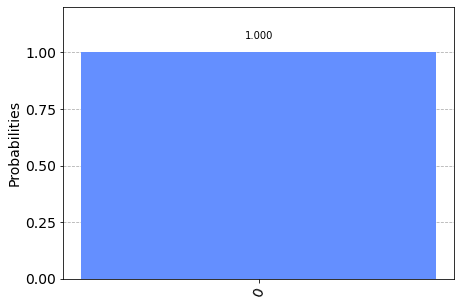

In [8]:
job = execute(qc, backend)
results = job.result()
count = results.get_counts()

plot_histogram(count)

### H gate : Hadamard gate, create superposition

$H = \frac{1}{\sqrt{2}} \begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix} , ~~~~~~  HH = I $

$H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |+\rangle ~~~~~~~~~
H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = |-\rangle$ 

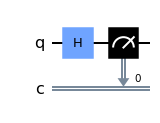

In [9]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)

qc.draw('mpl')

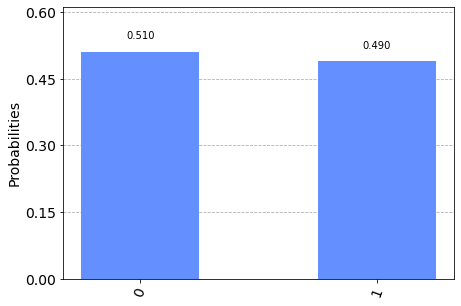

In [10]:
job = execute(qc, backend)
results = job.result()
count = results.get_counts()

plot_histogram(count)

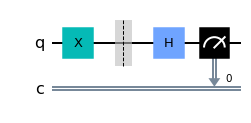

In [7]:
qc = QuantumCircuit(1,1)
qc.x(0)
qc.barrier()
qc.h(0)
qc.measure(0,0)

qc.draw('mpl')

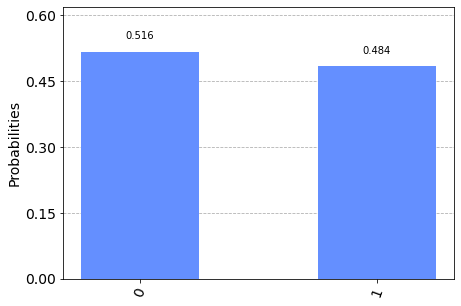

In [12]:
job = execute(qc, backend)
results = job.result()
count = results.get_counts()

plot_histogram(count)

In [17]:
execute?

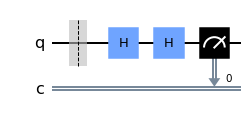

In [28]:
qc = QuantumCircuit(1, 1)
#qc.x(0)
qc.barrier()
qc.h(0)
qc.h(0)
qc.measure(0, 0)
qc.draw('mpl')

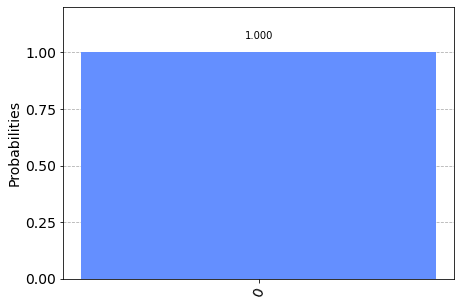

In [29]:
job = execute(qc, backend)
results = job.result()
count = results.get_counts()

plot_histogram(count)

### Phase gate

### Z gate :  create relative phase $\pi$

$Z = \begin{bmatrix}1 & 0 \\ 0 & -1 \end{bmatrix} , ~~~~~~ ZZ=I $

$Z|0\rangle = |0\rangle ~~~~~~~~~
Z|1\rangle = e^{i\pi} |1\rangle = - |1\rangle $ 

### S gate:  create relative phase $\pi/2$

$S = \begin{bmatrix}1 & 0 \\ 0 & i \end{bmatrix} ~~~~~~ SS^{\dagger}=I $

$S|0\rangle = |0\rangle ~~~~~~~~~
S|1\rangle = e^{i\pi/2}|1\rangle = i |1\rangle $ 

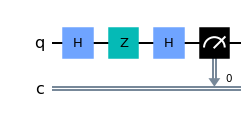

In [15]:
qc_z = QuantumCircuit(1,1)
qc_z.h(0)
qc_z.z(0)
qc_z.h(0)
qc_z.measure(0, 0)
qc_z.draw('mpl')

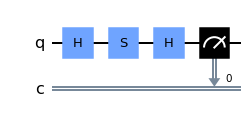

In [16]:
qc_s = QuantumCircuit(1,1)
qc_s.h(0)
qc_s.s(0)
qc_s.h(0)
qc_s.measure(0, 0)
qc_s.draw('mpl')

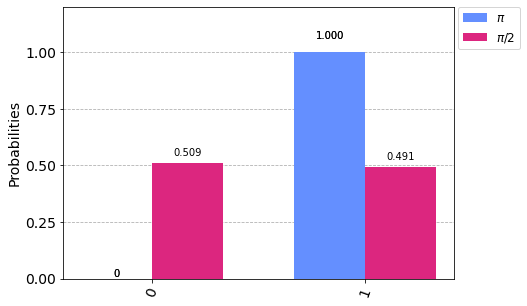

In [17]:
job = execute([qc_z, qc_s], backend)
results = job.result()
counts = results.get_counts()

plot_histogram(counts, legend=['$\pi$', '$\pi/2$'])

# Concepts
## Composite system, Entanglement, two-qubit Gate

![](images/HPC_Korea_session1.024.jpeg)

![](images/HPC_Korea_session1.025.jpeg)

![](images/HPC_Korea_session1.026.jpeg)

![](images/HPC_Korea_session1.027.jpeg)

![](images/HPC_Korea_session1.028.jpeg)

## Construct Bell state

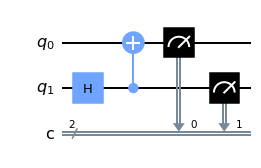

In [30]:
bell = QuantumCircuit(2,2)
bell.h(1)
bell.cx(1, 0)
bell.measure(range(2), range(2))
bell.draw('mpl')

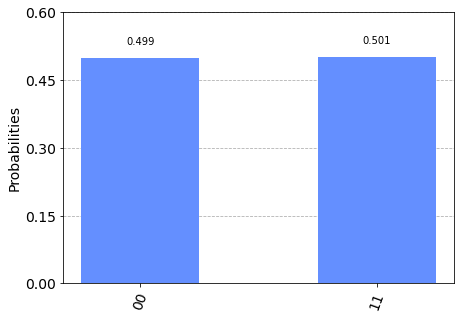

In [31]:
job = execute(bell, backend)
counts = job.result().get_counts()

plot_histogram(counts)

## Execute Bell State on Quantum Computer

![](images/HPC_Korea_session1.029.jpeg)

![](images/HPC_Korea_session1.030.jpeg)

To work locally: The given token should be saved into Qiskit.
[IBM quantum experience](https://quantum-computing.ibm.com)

In [22]:
#IBMQ.save_account('TOKEN')

### Load the account

In [4]:
provider = IBMQ.load_account()

/opt/miniconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


### Choose a device.

In [44]:
# Veiw available backends

provider.backends() ## ibmq_qasm_simulator : can simulate 32 qubits

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [19]:
import qiskit.tools.jupyter

backend = provider.get_backend('ibmq_vigo')
backend;

[IBM quantum experience](https://quantum-computing.ibm.com)

In [8]:
backends_sel = provider.backends(filters=lambda x:not x.configuration().simulator and 
                                x.configuration().n_qubits >=2 and x.status().operational==True)
backends_sel

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [20]:
from qiskit.providers.ibmq import least_busy

backend = least_busy(backends_sel)

backend

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

### Execute Bell state on the chosen quantum system.

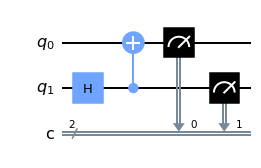

In [17]:
bell = QuantumCircuit(2,2)
bell.h(1)
bell.cx(1, 0)
bell.measure(range(2), range(2))
bell.draw('mpl')

In [18]:
backend = provider.get_backend('ibmq_athens')

Maximum number of shots : 8192

The `Job` object is the reference used to check the status of the computation and return the results.

In [49]:
from qiskit.tools.monitor import job_monitor

max_shots = 8192
job = execute(bell, backend, shots=max_shots)
print(job.job_id())
job_monitor(job)

5faff3866b5ac90013642503
Job Status: job has successfully run


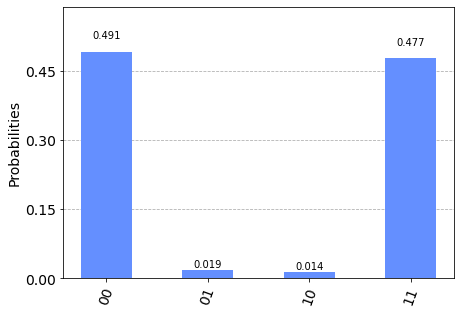

In [50]:
counts = job.result().get_counts()
plot_histogram(counts)

In [161]:
# job = backend.retrieve_job('5faff3866b5ac90013642503')
# counts = job.result().get_counts()
# plot_histogram(counts)

In [53]:
backend = provider.get_backend('ibmqx2')

job = execute(bell, backend, shots=max_shots)
print(job.job_id())
job_monitor(job)

5faff5c4abae3600125c72f5
Job Status: job has successfully run


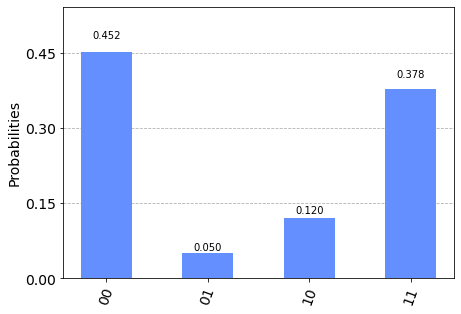

In [54]:
counts = job.result().get_counts()
plot_histogram(counts)

**Near-term Quantum Systems have noisy qubits, gates, and measurements.**

The noise properties of devices and individual qubits are different.

## Hands on Problem

1. Construct a quantum circuit that gives the 5 qubit state $|\psi\rangle = \frac{1}{\sqrt{2}}(|00000\rangle+|11111\rangle)$

2. Simulate circuit to verify you get what you expect.

3. Run on a real quantum device (pick any one).

4. Plot the results.